## 5 Results and investment strategies on real data
### 5.2 Signals study

In [1]:
import os
path = os.getcwd() + '/results/'
path_data = os.getcwd() + '/data/'

os.chdir('../')
from inference_mahmm import *

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms as mtransforms
from scipy.stats import gaussian_kde

palette = sns.color_palette("tab10", 10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### Results recuperation

In [2]:
valeur = 'sp500'
y, dates = np.load(path + f'y_{valeur}_L0_monthly_bis.npy'), np.load(path + f'dates_{valeur}_L0_monthly_bis.npy')
dates = [pd.to_datetime(d) for d in dates]

xb_L0, xc_L0 = np.load(path + f'xb_{valeur}_L0_monthly_bis.npy'), np.load(path + f'xc_{valeur}_L0_monthly_bis.npy')
xb_L2, xc_L2 = np.load(path + f'xb_{valeur}_L2_monthly_bis.npy'), np.load(path + f'xc_{valeur}_L2_monthly_bis.npy')
xb_L5, xc_L5 = np.load(path + f'xb_{valeur}_L5_monthly_bis.npy'), np.load(path + f'xc_{valeur}_L5_monthly_bis.npy')
xb_L8, xc_L8 = np.load(path + f'xb_{valeur}_L8_monthly_bis.npy'), np.load(path + f'xc_{valeur}_L8_monthly_bis.npy')
xb_L10, xc_L10 = np.load(path + f'xb_{valeur}_L10_monthly_bis.npy'), np.load(path + f'xc_{valeur}_L10_monthly_bis.npy')
xb_Lvar, xc_Lvar = np.load(path + f'xb_{valeur}_Lvar_monthly.npy'), np.load(path + f'xc_{valeur}_Lvar_monthly.npy')

In [3]:
xb_all, xc_all = [np.ones(len(xb_L0)), xb_L0, xb_L2, xb_L5, xb_L8, xb_L10, xb_Lvar], [np.ones(len(xc_L0)), xc_L0, xc_L2, xc_L5, xc_L8, xc_L10, xc_Lvar]
signal_all = ['Benchmark', 'HMM', 'MA(2)-HMM', 'MA(5)-HMM', 'MA(8)-HMM', 'MA(10)-HMM', 'MA(L)-HMM with model selection']

##### Signals study

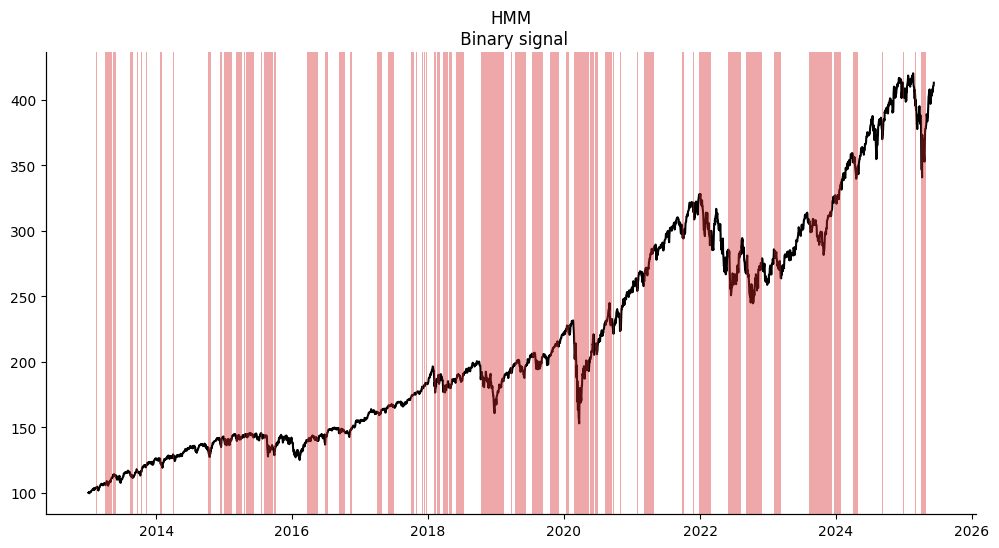

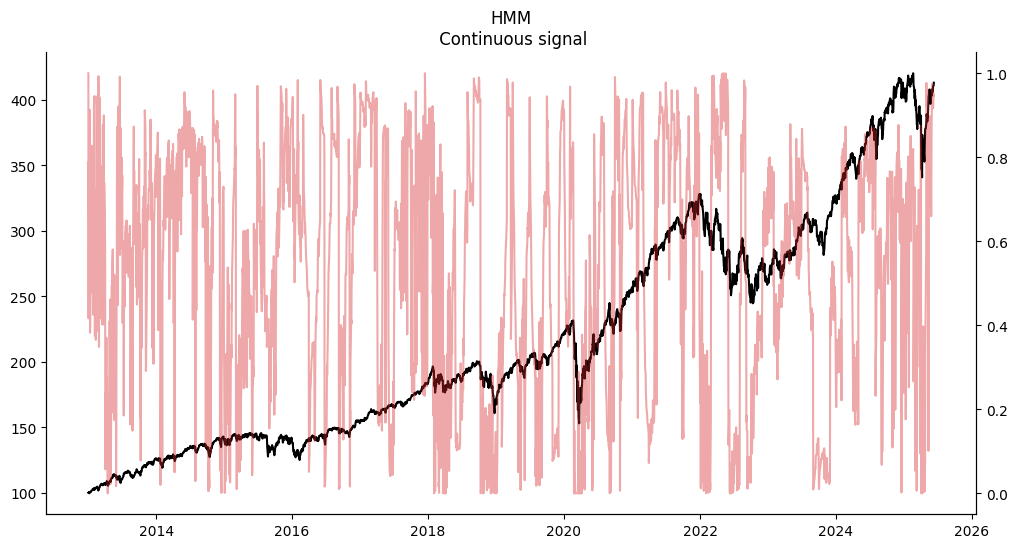

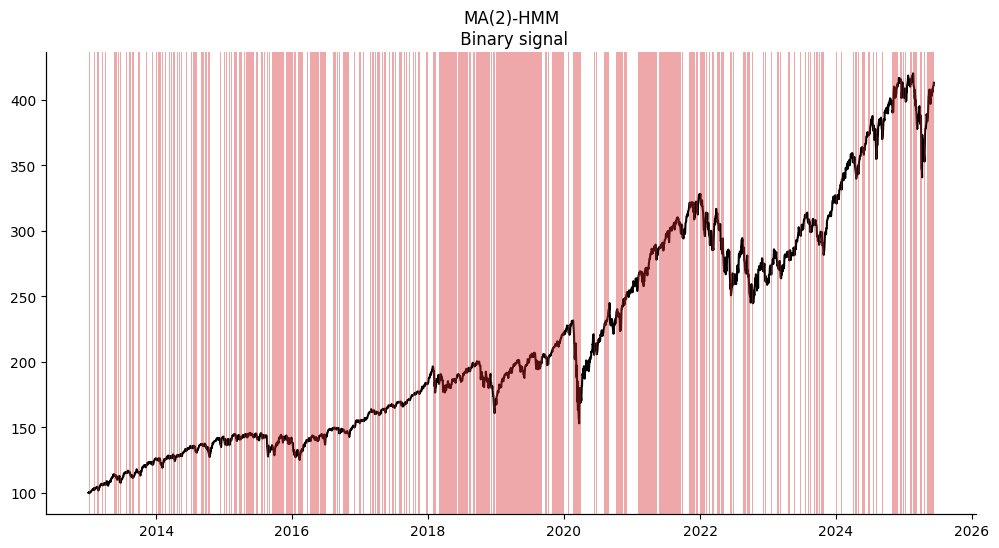

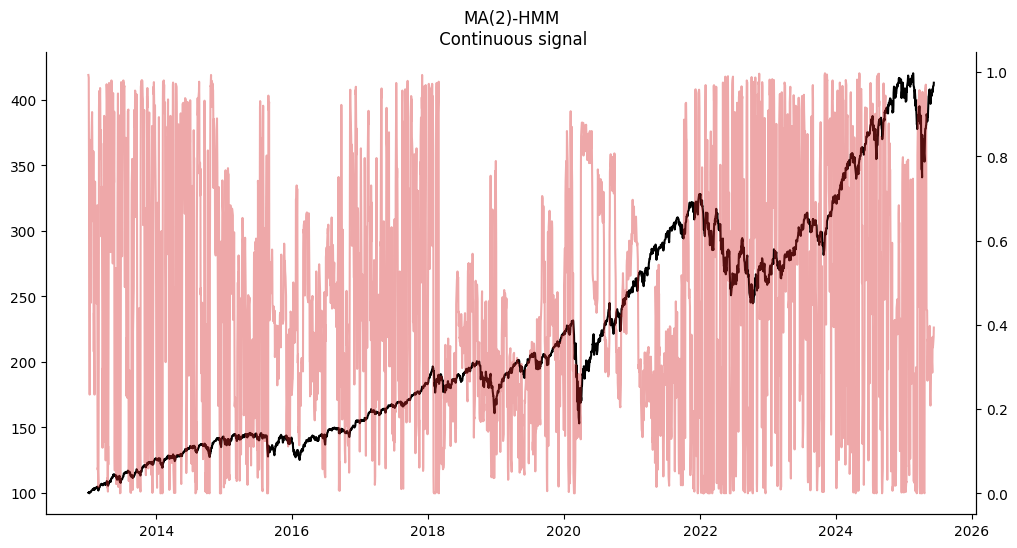

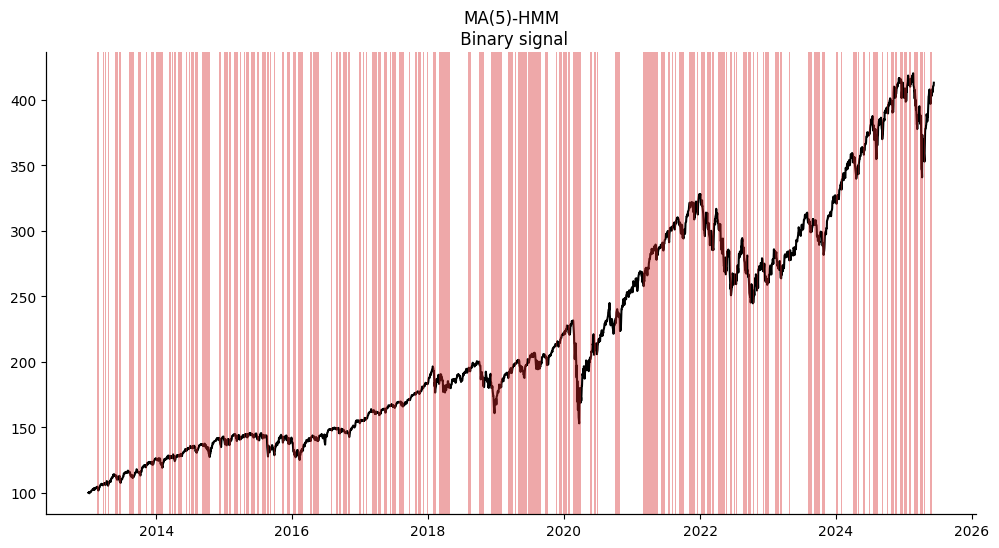

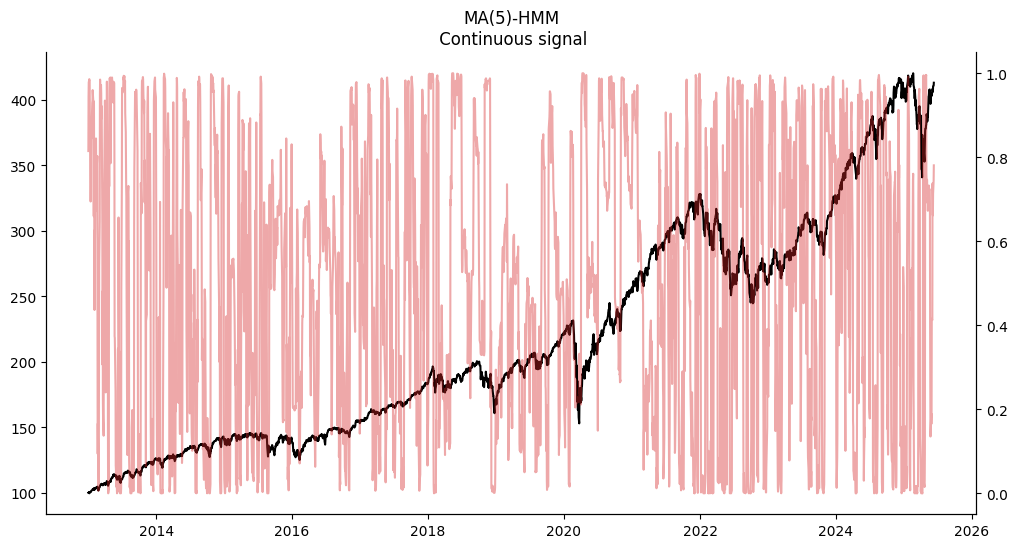

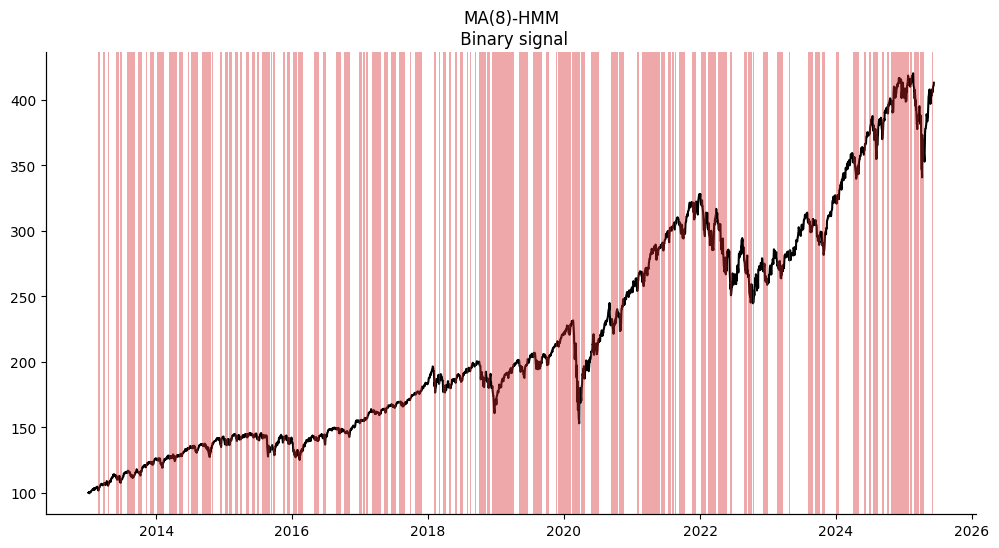

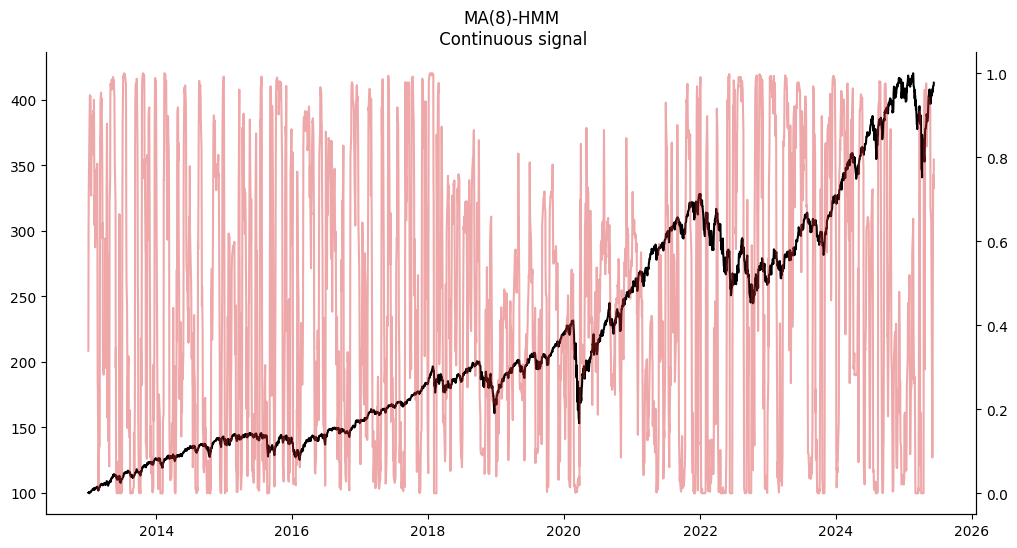

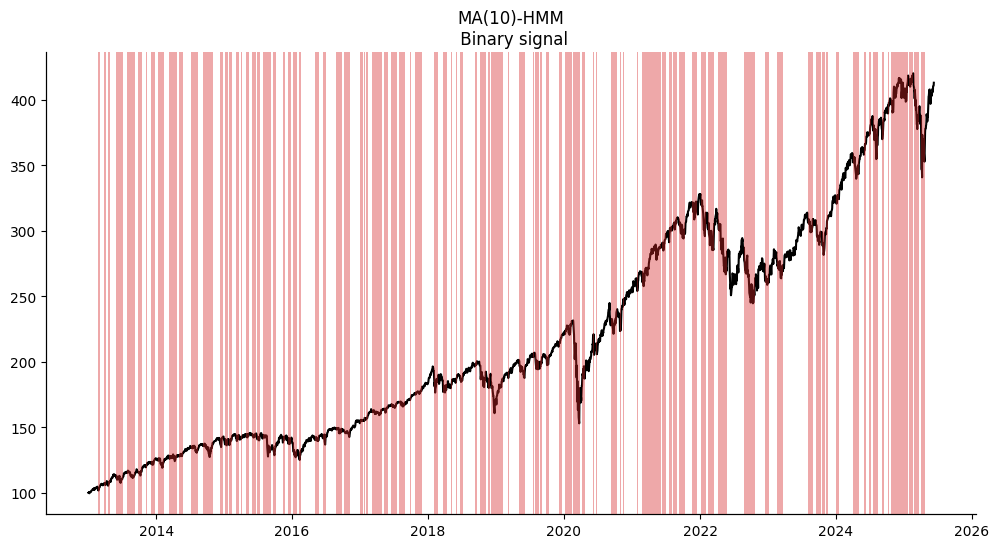

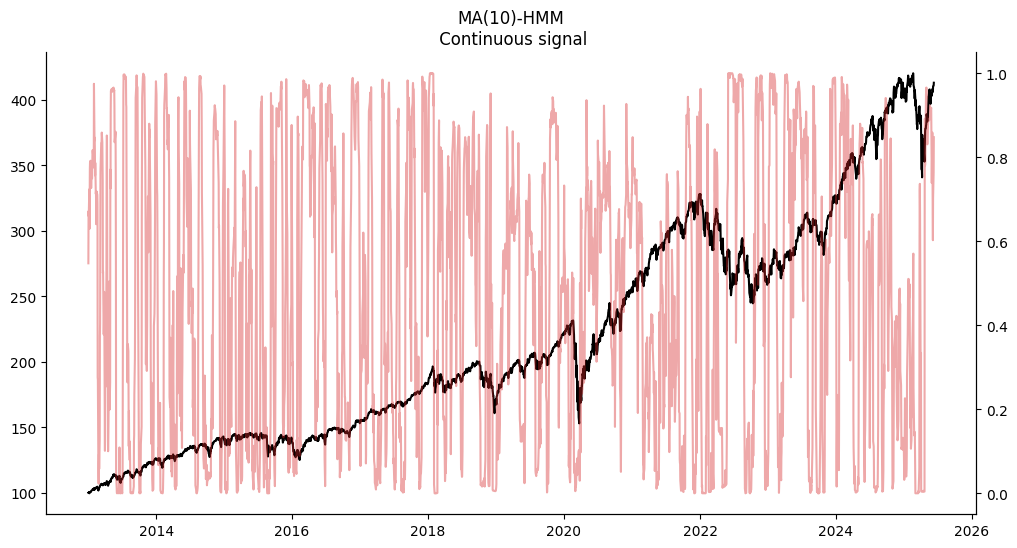

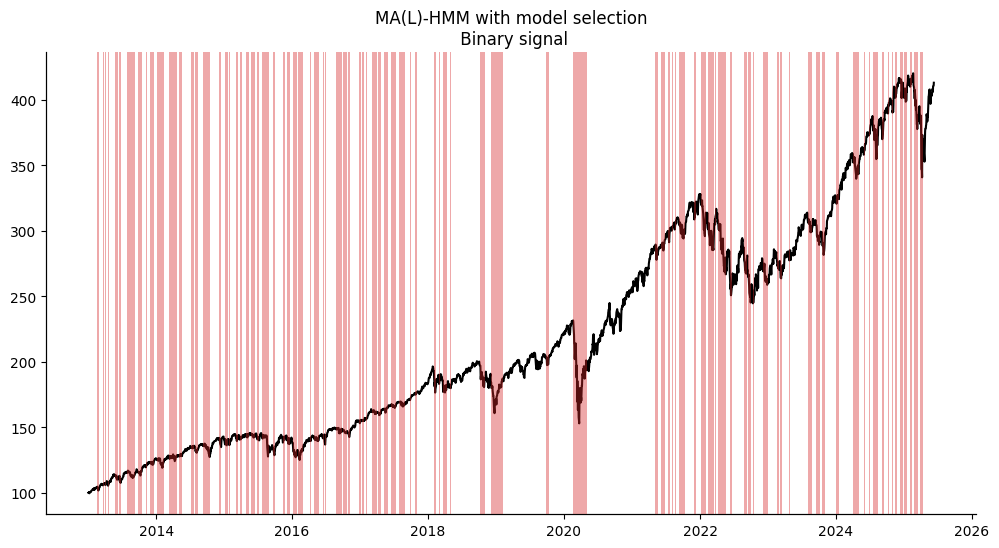

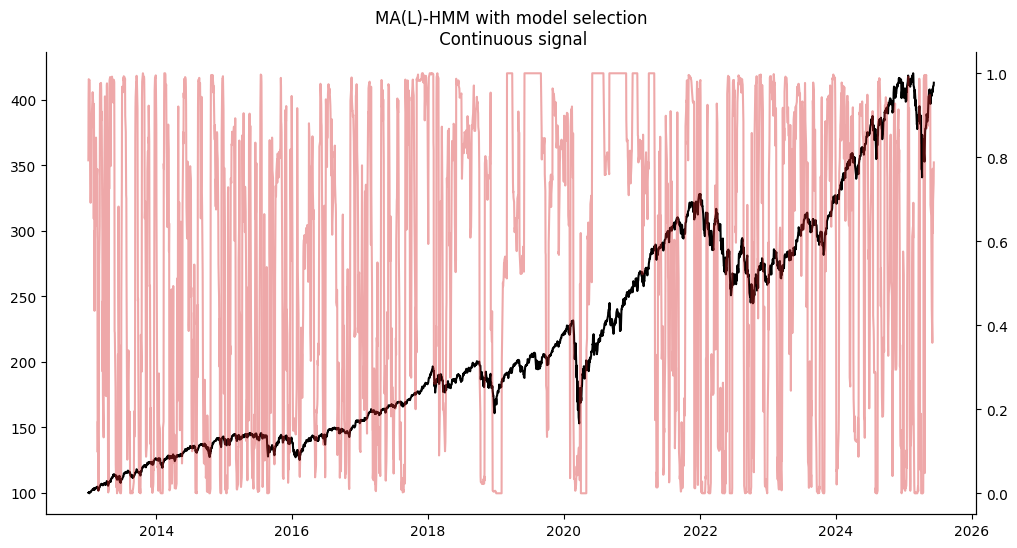

In [4]:
for i in range(1, len(xb_all)):
    xb, xc = xb_all[i], xc_all[i]

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(dates, compute_price(y), color='black')
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax2 = ax.twinx()
    
    for j, color in enumerate(palette[3:4]):
        ax2.fill_between(dates, 0, 1, where=(xb)==j, facecolor=color, transform=trans, alpha=.4, label='Regime ' + str(j+1))
    ax2.set_yticks([])
    plt.title(signal_all[i] + '\n Binary signal')
    sns.despine()
    plt.show()

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(dates, compute_price(y), color='black')
    ax2 = ax.twinx()
    plt.plot(dates, xc, color=palette[3], alpha=.4)
    plt.title(signal_all[i] + '\n Continuous signal')
    sns.despine(top=True, right=False, left=False, bottom=False)
    plt.show()